In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go

In [8]:
df=pd.read_csv("crimes_against_women_2001-2014.csv")
df.drop(['sr_no'], axis=1)
df.head()

,sr_no,state/ut,district,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women,insult_to_modesty,cruelty_by_husband_or_relatives,importation_of_girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


<AxesSubplot:xlabel='rape'>

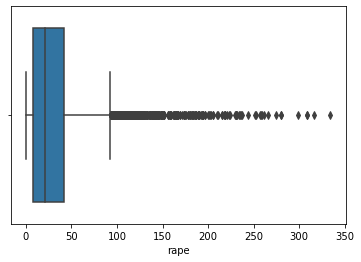

In [12]:
sns.boxplot(df['rape'])

In [ ]:
a = df.rape.mean()
df["rape"] = np.where(df["rape"] >350, a,df['rape'])

<AxesSubplot:xlabel='kidnapping_and_abduction'>

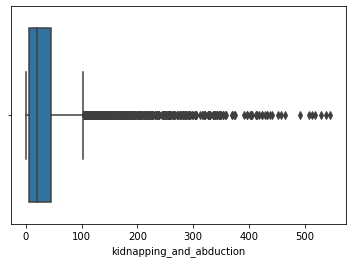

In [15]:
sns.boxplot(df['kidnapping_and_abduction'])

In [14]:
b = df.kidnapping_and_abduction.mean()
df["kidnapping_and_abduction"] = np.where(df["kidnapping_and_abduction"] >550, b,df['kidnapping_and_abduction'])

<AxesSubplot:xlabel='dowry_deaths'>

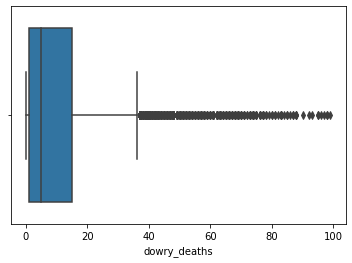

In [19]:
sns.boxplot(df['dowry_deaths'])

In [17]:
c = df.dowry_deaths.mean()
df["dowry_deaths"] = np.where(df["dowry_deaths"] >110, c,df['dowry_deaths'])

<AxesSubplot:xlabel='assault_on_women'>

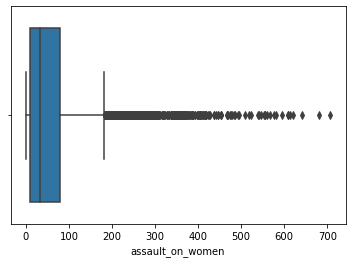

In [21]:
sns.boxplot(df['assault_on_women'])

In [20]:
d = df.assault_on_women.mean()
df["assault_on_women"] = np.where(df["assault_on_women"] >800, d,df['assault_on_women'])

<AxesSubplot:xlabel='insult_to_modesty'>

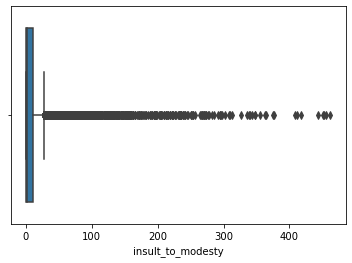

In [24]:
sns.boxplot(df['insult_to_modesty'])

In [23]:
e = df.insult_to_modesty.mean()
df["insult_to_modesty"] = np.where(df["insult_to_modesty"] >500, e,df['insult_to_modesty'])

<AxesSubplot:xlabel='cruelty_by_husband_or_relatives'>

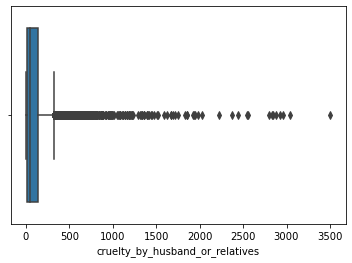

In [25]:
sns.boxplot(df['cruelty_by_husband_or_relatives'])

In [ ]:
f = df.cruelty_by_husband_or_relatives.mean()
df["cruelty_by_husband_or_relatives"] = np.where(df["cruelty_by_husband_or_relatives"] >3200, f,df['cruelty_by_husband_or_relatives'])

<AxesSubplot:xlabel='importation_of_girls'>

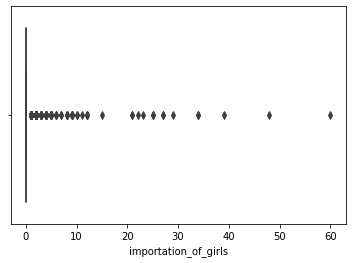

In [26]:
sns.boxplot(df['importation_of_girls'])

In [ ]:
g = df.importation_of_girls.mean()
df["importation_of_girls"] = np.where(df["importation_of_girls"] >30, g,df['importation_of_girls'])

<AxesSubplot:>

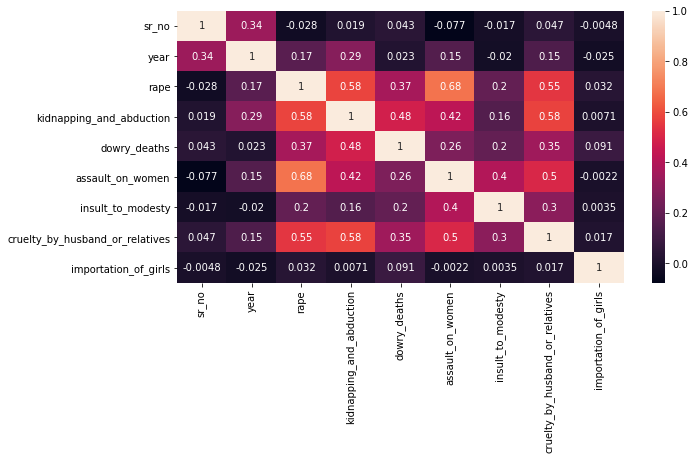

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

In [28]:
df['total_crimes']=(df['rape']+df['kidnapping_and_abduction']+df['dowry_deaths']+
                       df['assault_on_women']+
                       df['insult_to_modesty']+df['cruelty_by_husband_or_relatives']+
                       df['importation_of_girls'])

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(df.year, df.total_crimes, errwidth=0)
plt.ylabel('Frequency')
plt.title('Trend of Total Crimes', fontdict = {'fontsize' : 15})

In [ ]:
crimes=['rape','kidnapping_and_abduction','dowry_deaths','assault_on_women', 'insult_to_modesty','cruelty_by_husband_or_relatives','importation_of_girls','total_crimes']

df1=pd.DataFrame()
for i in crimes:
    df_crimes=df.groupby(['year'])[i].sum()
    df1[i]=df_crimes

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.lineplot(data=df1,palette='gnuplot_r',linestyle="dashed")

In [ ]:
df_top_crimes=pd.DataFrame(columns=['crimes',"total_crimes"])
for i in crimes:
    df_top_crimes=df_top_crimes.append({'crimes':i ,'total_crimes':df[i].sum(axis=0)},ignore_index=True)

    
fig = go.Figure(data=[go.Pie(labels=df_top_crimes['crimes'], values= df_top_crimes['total_crimes'])])
fig.update_layout(title_text = "Pie Chart of the crimes in India")
fig.show()